In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Titanic Dataset
- Explains survival based on multiple factors such as gender and class of travel.

In [4]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking where we have null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Stats on gender

In [6]:
df.groupby("Sex")["PassengerId"].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

# Survival rate based on gender

In [7]:
survived = df[df['Survived']==1]
died = df[df['Survived']==0]
print("Total Passengers: {}, Survived: {}, Died: {}".format(df["PassengerId"].count(), 
                                                            survived['PassengerId'].count(), 
                                                            died["PassengerId"].count()))
female_survivors = survived[survived["Sex"]=='female']["PassengerId"].count()
male_survivors = survived[survived["Sex"]=='male']["PassengerId"].count()
print("male survival rate: {}, female survival rate: {}".format((male_survivors/577)*100, 
                                                                (female_survivors/314)*100))

Total Passengers: 891, Survived: 342, Died: 549
male survival rate: 18.890814558058924, female survival rate: 74.20382165605095


# Histogram

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

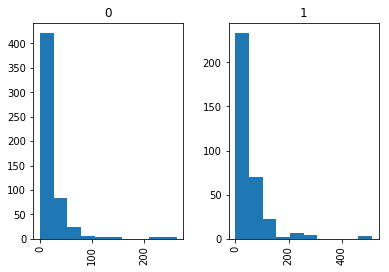

In [8]:
h = df.hist(column='Fare',by=df['Survived'], bins=10)
df['Fare'].describe()

# Lab:
- How does survival rate compare in cabin class?
- Create age buckets and visualize survival histogram for the buckets.

In [11]:
df['Pclass'].unique()

array([3, 1, 2])

In [38]:
first_class = df[df['Pclass']==1]
second_class = df[df['Pclass']==2]
third_class = df[df['Pclass']==3]
fcc = first_class['PassengerId'].count()
scc = second_class['PassengerId'].count()
tcc = third_class['PassengerId'].count()
print( fcc + scc + tcc, df['PassengerId'].count())


891 891


In [30]:
fcs = first_class[first_class['Survived']==1]['PassengerId'].count()
fcd = fcc - fcs
(fcs, fcd)

(136, 80)

In [31]:
scs = second_class[second_class['Survived']==1]['PassengerId'].count()
scd = scc - scs
(scs, scd)

(87, 97)

In [32]:
tcs = third_class[third_class['Survived']==1]['PassengerId'].count()
tcd = tcc - tcs
(tcs, tcd)

(119, 372)

In [36]:
((fcs/fcc)*100, (scs/scc)*100, (tcs/tcc)*100)

(62.96296296296296, 47.28260869565217, 24.236252545824847)